# Voyager Images: a simocorbo side project
<div align="center">
<img src="resources/goldenrecord.jpg" width=500 >
</div>

Voyager Images is a project aimed at decoding the images stored as a stereo audio track

The clock reference is the fundamental transition of the hydrogen atom, which is $1.42GHz=7.042\cdot 10^{-10}s$
In the top left circle there is the representation of the disk, along with the stylus.
The number: $\texttt{1001 1000 0110 0100 0000 0000 0000 0000 0}_2=5113380864_{10}$
When multiplied by the unit reference, one obtains $3.6\ s$ which is the period of one rotation of the disk

The upper right image has a binary number below the waves:
$\texttt{1011 0100 1100 0000 0000 0000}_2=11845632_{10}$

After converting it to seconds one obtains $8.3417 ms$ which is the time of the scan, starting from the peaks.

The numbers above the 2nd square from the top represent how the images are encoded and it means that each image is composed by 512 columns, so each image gets mapped onto $512\times 8.3417ms=4.27s$

From the analysis of the spectrogram it can be seen where the images start and end

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
# load the audio file
sample_rate, audio_data = scipy.io.wavfile.read('resources/voyager_images_double.wav')

In [3]:
# compute the spectrogram for the left channel
frequencies, times, Sxx = scipy.signal.spectrogram(audio_data[:, 0], sample_rate)

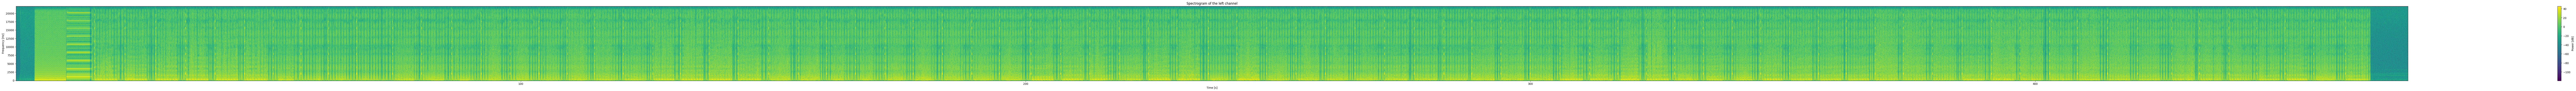

In [5]:
# plot the spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of the left channel')
plt.colorbar(label='Power [dB]')
# set the size of the plot
plt.gcf().set_size_inches(200, 5)
plt.show()

The images are both in the left and right audio channel, starting from the left one, the spectrogram of the first 30 second is:

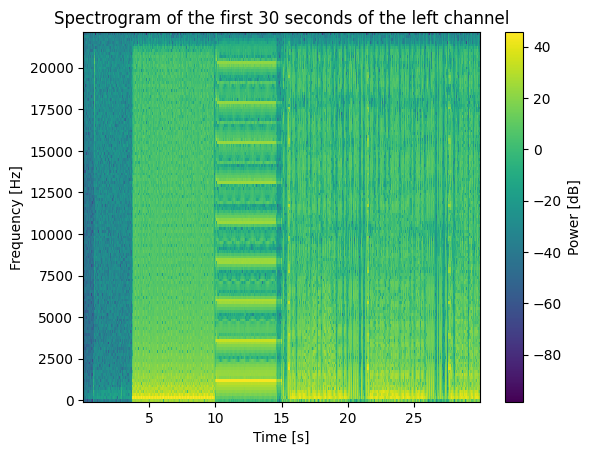

In [6]:
# extract the first 30 seconds of the left channel
audio_data_30s = audio_data[:30 * sample_rate, 0]
# generate the spectrogram for the first 30 seconds
frequencies_30s, times_30s, Sxx_30s = scipy.signal.spectrogram(audio_data_30s, sample_rate)
# plot the spectrogram
plt.pcolormesh(times_30s, frequencies_30s, 10 * np.log10(Sxx_30s))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of the first 30 seconds of the left channel')
plt.colorbar(label='Power [dB]')
plt.show()

It is clear that the image starts at 15 seconds, so we can extract the peaks and we can start decoding from the last peak

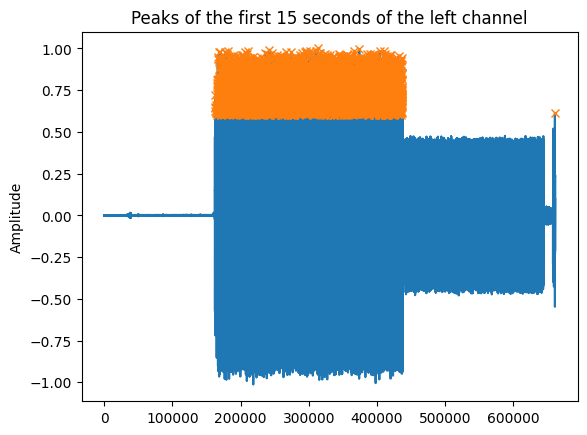

In [17]:
# extract the first 15 seconds of the left channel
audio_data_15s = audio_data[:15 * sample_rate, 0]

# normalise the audio data
audio_data_15s = audio_data_15s / np.max(audio_data_15s)
# compute the peaks of the signal
peaks = scipy.signal.find_peaks(audio_data_15s, height=np.max(audio_data_15s)*0.6)
# plot the peaks
plt.plot(audio_data_15s)
plt.plot(peaks[0], audio_data_15s[peaks[0]], 'x')
plt.ylabel('Amplitude')
plt.xlabel
plt.title('Peaks of the first 15 seconds of the left channel')
plt.show()